# Финальное задание модуля PYTHON-13 #
## (Анализ и визуализация данных) ##
Подробное описание содержится в файле [**`README.md`**](https://github.com/stalkspectrum/sf-ds-course-all/blob/master/01-16-PYTHON-13/P13_Task/README.md).

### Предварительная подготовка данных ###

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Для корректной работы Jupyter Notebook
%matplotlib inline
## Для корректного отображения графиков в тёмной теме
plt.style.use('default')

main_df = pd.read_csv('churn.csv', sep=',')

# Убираем лишний столбец RowNumber
main_df.drop('RowNumber', axis='columns', inplace=True)

# Меняем тип данных столбцов HasCrCard, IsActiveMember на boolean
# main_df['HasCrCard'] = main_df['HasCrCard'].apply(lambda x: True if x == 1. else False).astype('bool')
# main_df['IsActiveMember'] = main_df['IsActiveMember'].apply(lambda x: True if x == 1. else False).astype('bool')

# Меняем числовой тип данных (1/0) признака Exited на категориальный строковый (Exited/Loyal)
# main_df['Exited'] = main_df['Exited'].apply(lambda x: 'Exited' if x == 1. else 'Loyal').astype('category')
display(main_df.head())
display(main_df.info())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


None

----

### Задание 9.1. ###
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

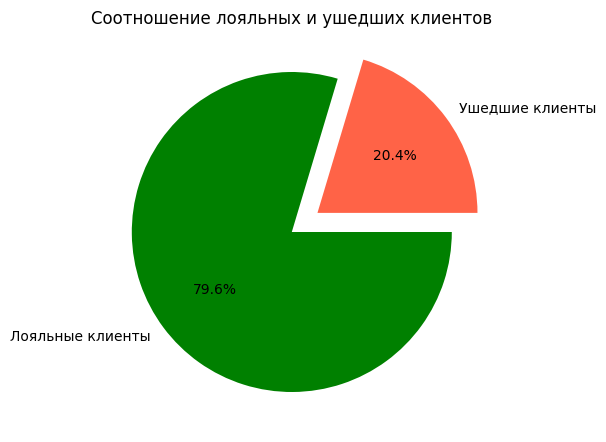

In [2]:
exited_clients = main_df[main_df['Exited'] == 1]['Exited'].shape[0]
loyal_clients = main_df.shape[0] - exited_clients

loyalty_pic = plt.figure(figsize=(4, 5))
axes = loyalty_pic.add_axes([0, 0, 1, 1])
axes.pie(
    x=[loyal_clients, exited_clients],
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    colors=['green', 'tomato'],
    autopct='%.1f%%',
    explode=[0, 0.2],
    shadow=False,
    counterclock=False
)
axes.set_title('Соотношение лояльных и ушедших клиентов');

***Комментарий***

Из графика видно, что ушедшие клиенты составляет значительную долю (больше **20%**) за отчётный период. Само по себе это количество ещё ни о чём не говорит, поскольку неизвестен этот "отчётный период", однако если банк обеспокоился, надо проводить исследования того, чем ушедшие клиенты отличаются от оставшихся.

----

### Задание 9.2. ###
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше **2500** долларов. Опишите распределение и сделайте выводы.

Дополнительная статистика распределения клиентов по балансу:
              Balance
count    6383.000000
mean   119827.493793
std     30095.056462
min      3768.690000
25%    100181.975000
50%    119839.690000
75%    139512.290000
max    250898.090000


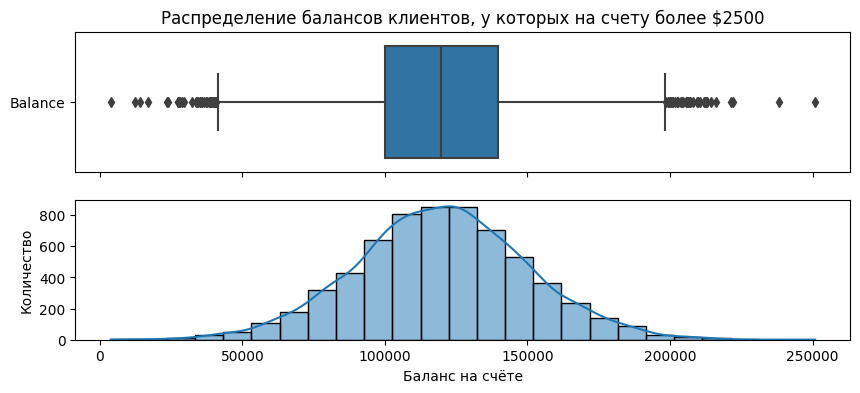

In [3]:
tmp_ser = main_df[main_df['Balance'] > 2500][['Balance']]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 4), sharex=True)
sns.boxplot(
    data=tmp_ser,
    orient='h',
    ax=ax1
)
sns.histplot(
    data=tmp_ser,
    bins=25,
    kde=True,
    legend=False,
    ax=ax2
)
ax1.set_title('Распределение балансов клиентов, у которых на счету более $2500')
ax1.set_xlabel('')
ax2.set_xlabel('Баланс на счёте')
ax2.set_ylabel('Количество')
print('Дополнительная статистика распределения клиентов по балансу:\n',
    tmp_ser.describe()
    )

***Комментарии***

- Распределение нормальное, симметричное. Среднее значение и медиана практически равны 120 тысячам.

- IQR также симметричен (от 100 до 140 тысяч).

- Можно утверждать, что для данной клиентской выборки у большинства клиентов баланс счёта лежит в диапазоне от 60 до 200 тысяч (внутри "усов") с некоторыми выбросами в обе стороны.

----

### Задание 9.3. ###
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Балансы клиентов, у кого меньше 2500:
 0.0    3617
Name: Balance, dtype: int64
Доля нулевых балансов среди лояльных клиентов: 39.1 %
Доля нулевых балансов среди ушедших клиентов: 24.5 %


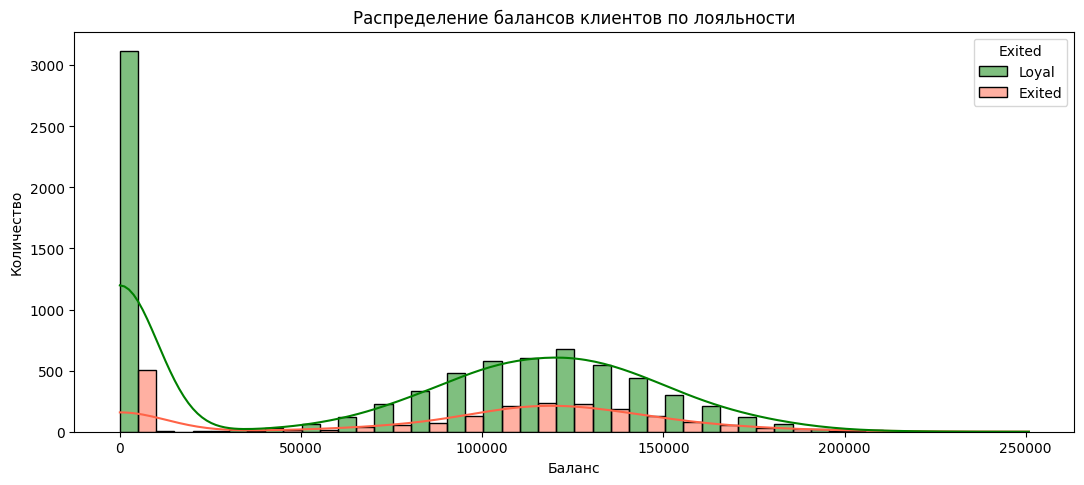

In [31]:
tmp_df = main_df.copy()
tmp_df['Exited'] = tmp_df['Exited']\
    .apply(lambda x: 'Exited' if x == 1. else 'Loyal')

balances_pic = plt.figure(figsize=(10, 4))
axes = balances_pic.add_axes([0, 0, 1, 1])
sns.histplot(
    data=tmp_df,
    x='Balance',
    hue='Exited',
    hue_order=['Loyal', 'Exited'],
    multiple='dodge',
    bins=25,
    palette={'Loyal': 'green', 'Exited': 'tomato'},
    kde=True,
    ax=axes
)
axes.set_title('Распределение балансов клиентов по лояльности')
axes.set_xlabel('Баланс')
axes.set_ylabel('Количество')
print(
    'Балансы клиентов, у кого меньше 2500:\n',
    tmp_df[tmp_df['Balance'] <= 2500]['Balance'].value_counts()
    )
print(
    'Доля нулевых балансов среди лояльных клиентов:',
    round(tmp_df[tmp_df['Exited'] == 'Loyal']['Balance']\
        .value_counts(normalize=True).loc[0.] * 100, 1),
    '%'
    )
print(
    'Доля нулевых балансов среди ушедших клиентов:',
    round(tmp_df[tmp_df['Exited'] == 'Exited']['Balance']\
        .value_counts(normalize=True).loc[0.] * 100, 1),
    '%'
    )

***Комментарии***

Обозначились первые различия. Выяснилось, что на самом деле у всех клиентов с низким балансом (меньше 2500) на счёте&nbsp;&mdash;**0**, и такие клиенты составляют 36.2% от всех клиентов (3617 из 10000).

Однако по признаку лояльности эти доли заметно отличаются&nbsp;&mdash; **39,1%** для лояльных и **24,5%** для ушедших.

----

### Задание 9.4. ###
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

----

### Задание 9.5. ###
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

----

### Задание 9.6. ###
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

***Подсказка***

Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу **`Exited`** (так как **1** — это ушедшие клиенты, а **0** — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

----

### Задание 9.7. ###
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

----

### Задание 9.8. ###
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

----

### Задание 9.9. ###
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

----

### Задание 9.10. ###
Переведите числовой признак **`CreditScore`** в категориальный. Для этого воспользуйтесь функцией `get_credit_score_cat()`, которая приведена ниже. Примените её к столбцу **`CreditScore`** и создайте новый признак **`CreditScoreCat`** — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (**`CreditScoreCat`**), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (**`Tenure`**). В ячейках сводной таблицы должно находиться среднее по признаку оттока (**`Exited`**) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.